#### QF 621 - Pair trading using technical indicators

In [111]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

from pandas_datareader import data as pdr

import datetime as dt
import yfinance as yf

In [112]:
import statsmodels.api as sm

In [113]:
# np.set_printoptions(precision = 3)

# pd.set_option("precision", 3)
# pd.set_option("display.float_format", lambda x: "%.3f" % x)

# plt.style.use("ggplot")

# mpl.rcParams["axes.grid"] = True
# mpl.rcParams["grid.color"] = "grey"
# mpl.rcParams["grid.alpha"] = 0.25

# mpl.rcParams["axes.facecolor"] = "white"

# mpl.rcParams["legend.fontsize"] = 14

In [114]:
%matplotlib inline

In [115]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [116]:
tickers = [('AUB', 'BXS'), ('AUB', 'CVBF'), ('AUB', 'FIBK'), ('AUB', 'FRME'), ('AUB', 'PRK'), ('AUB', 'SBSI'), ('AUB', 'TCBK'), ('BFC', 'FCAP'), ('ALSK', 'AMRS'), ('ALSK', 'ANIP'), ('ALSK', 'FCEL'), ('ALSK', 'INSG'), ('ALSK', 'MGI'), ('ALSK', 'MITK'), ('ALSK', 'MNKD'), ('ALSK', 'OPK'), ('ALSK', 'SMSI'), ('ALSK', 'VERU'), ('ALSK', 'VHC'), ('BHB', 'HBCP'), ('BHB', 'SONA'), ('ABM', 'GFF'), ('ABM', 'SXT'), ('CASS', 'GRC'), ('CASS', 'KBAL'), ('ARAY', 'SKY'), ('ARL', 'CBFV'), ('ARL', 'FUNC'), ('ARL', 'SAL'), ('ARL', 'STND'), ('AAWW', 'MTRX'), ('CWCO', 'ODC'), ('CPK', 'SJW'), ('CNXN', 'FLWS'), ('CDE', 'GORO'), ('ABCB', 'EBSB'), ('ABCB', 'WSFS'), ('APEI', 'UEIC'), ('AEGN', 'ASTE'), ('AEGN', 'HAYN'), ('AEGN', 'SCHN'), ('AEGN', 'TG'), ('AEGN', 'TRS'), ('AUBN', 'OVLY'), ('AUBN', 'TRNS'), ('BUSE', 'UVSP'), ('AMSC', 'AOSL'), ('AMSC', 'ATGE'), ('AMSC', 'AXTI'), ('AMSC', 'IVC'), ('AMSC', 'MPAA'), ('AMSC', 'WRLD'), ('AMEH', 'AYTU'), ('AMEH', 'PAYS'), ('AMEH', 'PLBC'), ('LRN', 'RGR'), ('LRN', 'SWBI'), ('EGP', 'TRNO'), ('BELFB', 'NVEC'), ('CNX', 'RRC'), ('FNHC', 'UIHC'), ('ABEO', 'BCLI'), ('ABEO', 'CBMG'), ('ABEO', 'CDXC'), ('ABEO', 'CELH'), ('ABEO', 'CRMD'), ('ABEO', 'CTSO'), ('ABEO', 'CYRX'), ('ABEO', 'ELA'), ('ABEO', 'HEAR'), ('ABEO', 'INS'), ('ABEO', 'MRKR'), ('ABEO', 'NYMX'), ('ABEO', 'OPRX'), ('ABEO', 'RVP'), ('ABEO', 'SAVA'), ('ABEO', 'SMED'), ('ABEO', 'SRNE'), ('ABEO', 'TXMD'), ('ABEO', 'VBIV'), ('ABEO', 'ZYXI'), ('ATHX', 'CORT'), ('ATHX', 'CYTK'), ('ATHX', 'DVAX'), ('ATHX', 'GERN'), ('ATHX', 'GLUU'), ('ATHX', 'GNMK'), ('ATHX', 'LCI'), ('ATHX', 'LXRX'), ('ATHX', 'MDGL'), ('ATHX', 'NVAX'), ('CRAI', 'ICFI'), ('LANC', 'WDFC'), ('CLDT', 'PEB'), ('AMSWA', 'PRSC'), ('BOCH', 'CIVB'), ('BOCH', 'FMNB'), ('AADR', 'ACLS'), ('CBAN', 'ESXB'), ('CBAN', 'FSFG'), ('CBAN', 'GCBC'), ('CBAN', 'MBCN'), ('CBAN', 'SBFG'), ('CMPR', 'GDEN'), ('ADC', 'PNM'), ('AMN', 'CRY'), ('AMN', 'CSGS'), ('AZZ', 'HNI'), ('B', 'KAMN'), ('BANR', 'CATY'), ('BANR', 'COLB'), ('BANR', 'ONB'), ('ACIW', 'CRVL'), ('CMC', 'ENS'), ('CMC', 'GATX'), ('CMC', 'KALU'), ('CMC', 'MTX'), ('CMC', 'NPO'), ('CMC', 'SPXC'), ('CMC', 'WOR'), ('AAON', 'HUBG'), ('CVCY', 'SMBC'), ('AROW', 'FNLC'), ('AGEN', 'ARNA'), ('AGEN', 'BCRX'), ('AGEN', 'CERS'), ('AGEN', 'EHTH'), ('AGEN', 'FOLD'), ('AGEN', 'HALO'), ('AGEN', 'IMGN'), ('AGEN', 'INSM'), ('AGEN', 'IRWD'), ('AGEN', 'PDLI'), ('AGEN', 'RIGL'), ('AGEN', 'SGMO'), ('AGEN', 'VNDA'), ('AGEN', 'ZIOP'), ('CLW', 'LCUT'), ('CIA', 'CTS'), ('CIA', 'EBF'), ('CIA', 'EXPO'), ('CIA', 'FSS'), ('CIA', 'HWKN'), ('CIA', 'IHC'), ('CIA', 'LMNR'), ('CIA', 'MLR'), ('CIA', 'NHC'), ('CIA', 'NNI'), ('CIA', 'PKE'), ('CIA', 'RGP'), ('CIA', 'ROCK'), ('CIA', 'SHYF'), ('CIA', 'TRC'), ('AJRD', 'OMCL'), ('HBNC', 'MBWM'), ('HBNC', 'PFBC'), ('HBNC', 'PGC'), ('HBNC', 'PPBI'), ('CVLT', 'INVA'), ('CVLT', 'SMCI'), ('BZH', 'KBH'), ('BZH', 'MTH'), ('AMOT', 'DBD'), ('APPS', 'PLUG'), ('HMN', 'IBOC'), ('CVA', 'CXW'), ('CKH', 'DRQ'), ('CPSI', 'WINA'), ('AVID', 'TNAV'), ('BCPC', 'KWR'), ('BCPC', 'LNN'), ('CMRE', 'SCU')]

In [117]:
# data = pd.read_csv("data/equity_data_full")
data = pd.read_csv('data/russell2000pvdata.csv', error_bad_lines=False)

/tmp/ipykernel_258949/422410944.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv("clustering/data/russell2000pvdata.csv", error_bad_lines=False)
b'Skipping line 109845: expected 8 fields, saw 11\n'


In [118]:
data.head()

,tickerid,ticker,date,open,high,low,close,volume
0,1,FLWS,20101227,2.78,3.04,2.76,2.90,411500.0
1,1,FLWS,20101228,2.91,2.97,2.79,2.85,210900.0
2,1,FLWS,20101229,2.84,2.88,2.75,2.81,114500.0
3,1,FLWS,20101230,2.77,2.84,2.71,2.72,135300.0
4,1,FLWS,20101231,2.70,2.75,2.62,2.69,158100.0


In [119]:
df = data.copy()
df = df.dropna(axis=0, how='any')
df = df.reset_index(drop=True)
df.head()

,tickerid,ticker,date,open,high,low,close,volume
0,1,FLWS,20101227,2.78,3.04,2.76,2.90,411500.0
1,1,FLWS,20101228,2.91,2.97,2.79,2.85,210900.0
2,1,FLWS,20101229,2.84,2.88,2.75,2.81,114500.0
3,1,FLWS,20101230,2.77,2.84,2.71,2.72,135300.0
4,1,FLWS,20101231,2.70,2.75,2.62,2.69,158100.0


In [ ]:
# data = df.pivot(index='date', columns = 'ticker', values = 'close')
# data.head()

In [120]:
data.index = data["ticker"]
# data.drop(columns= ["Unnamed: 0", "ticker"] , inplace=True)

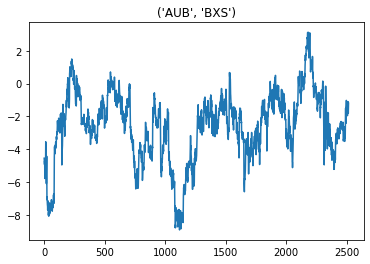

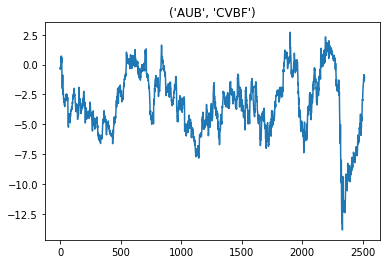

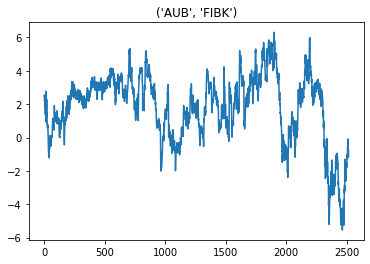

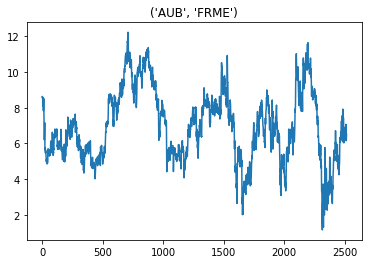

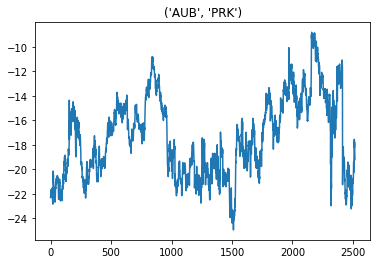

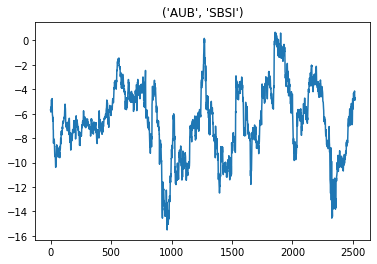

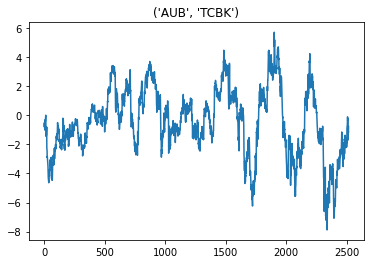

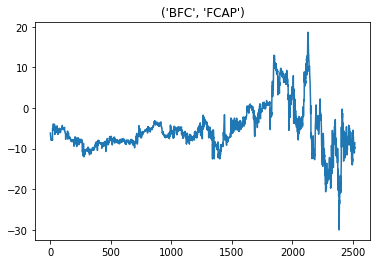

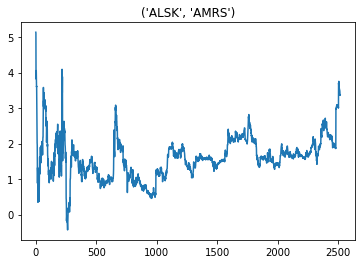

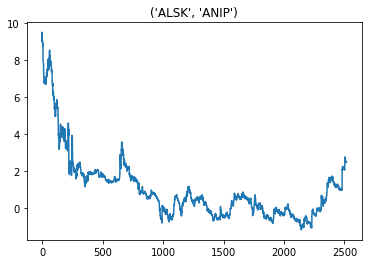

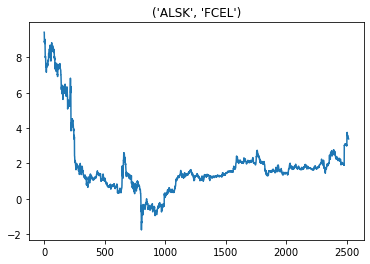

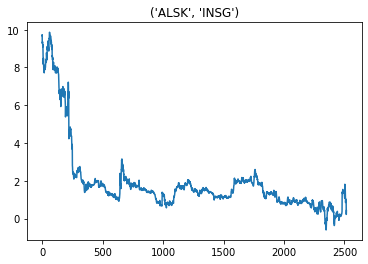

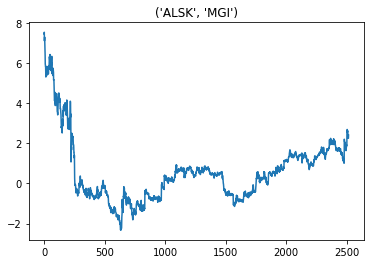

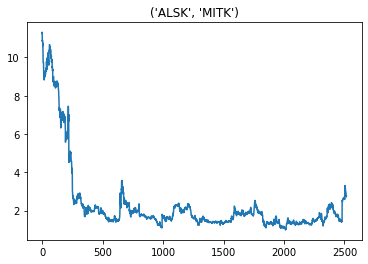

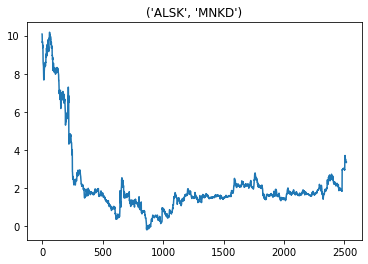

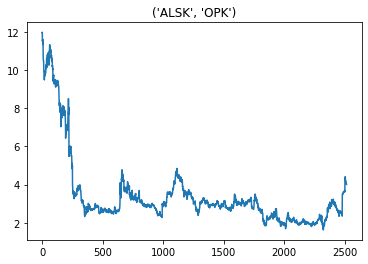

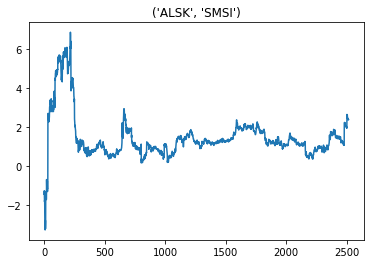

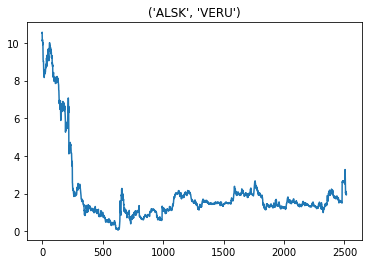

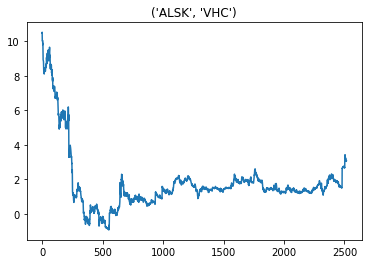

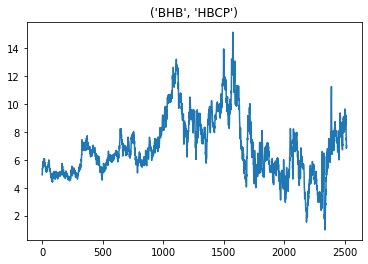

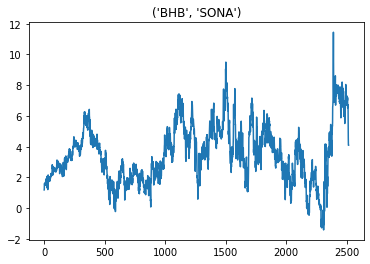

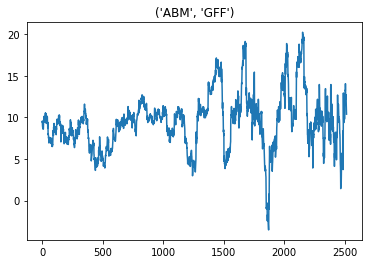

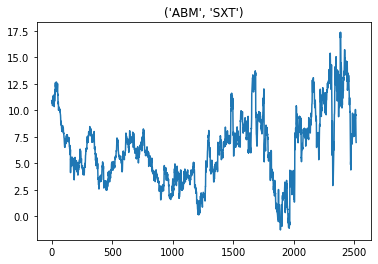

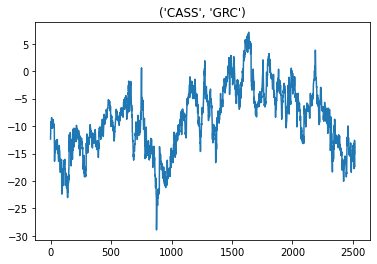

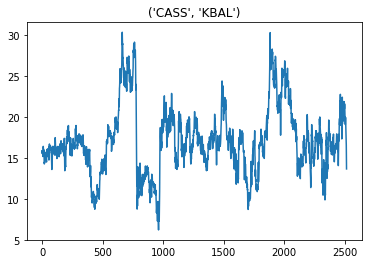

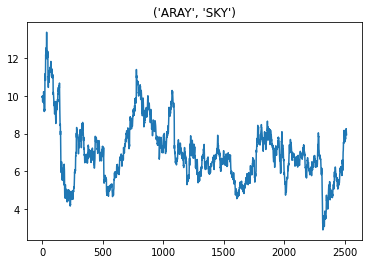

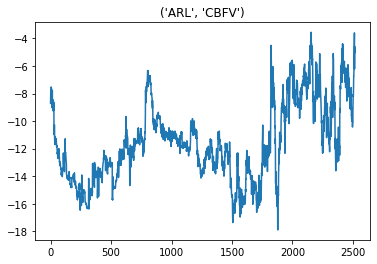

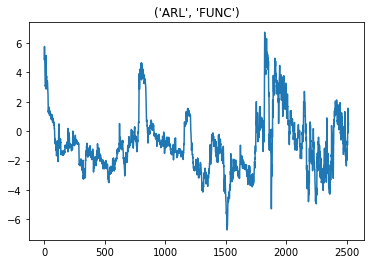

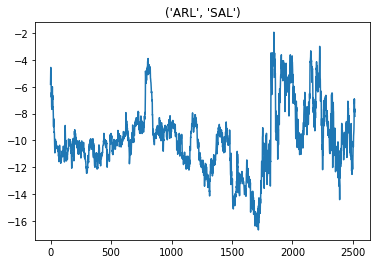

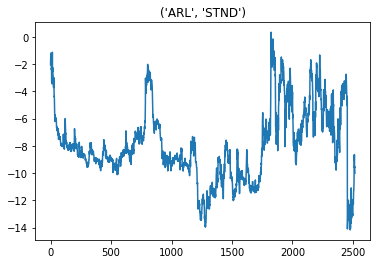

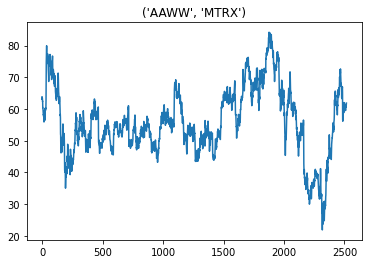

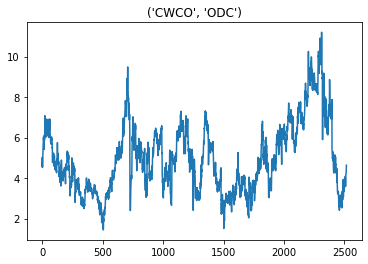

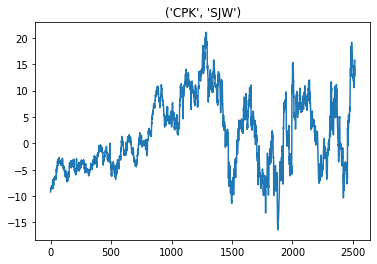

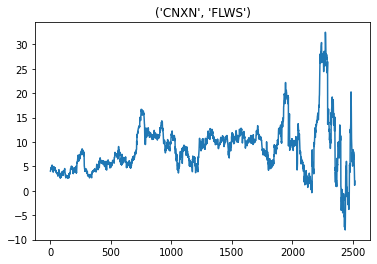

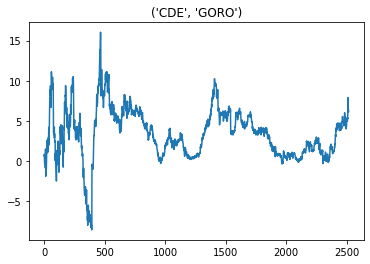

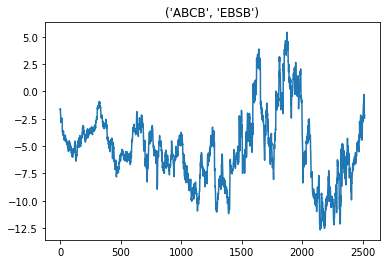

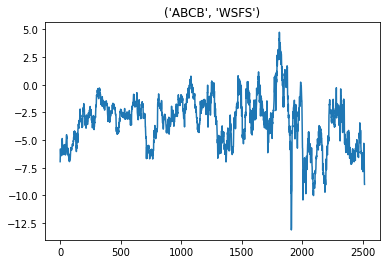

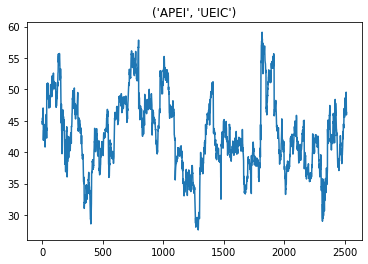

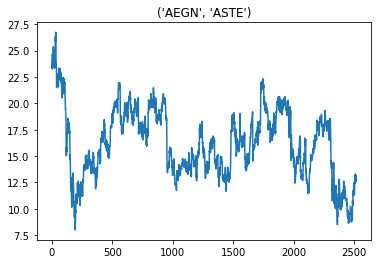

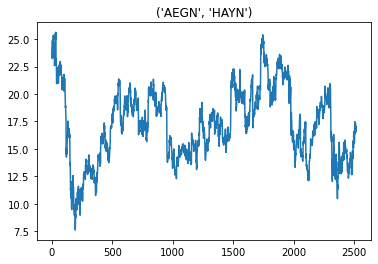

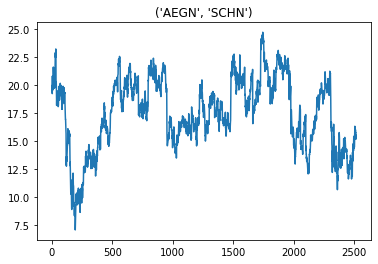

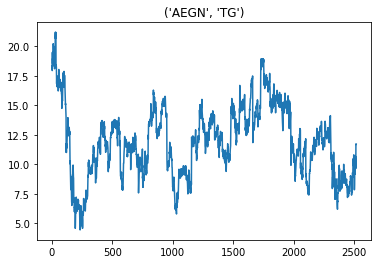

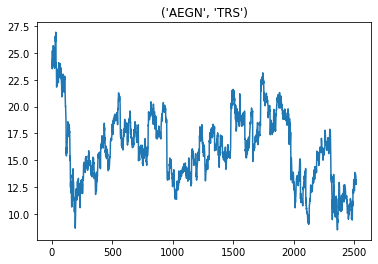

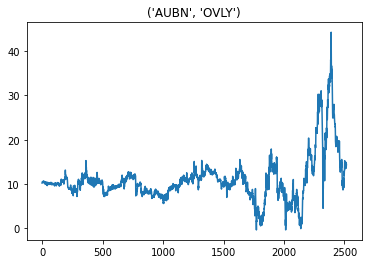

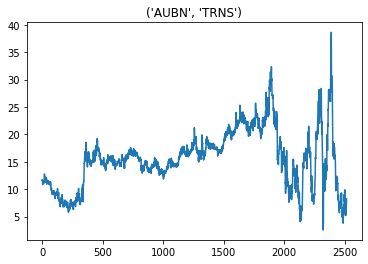

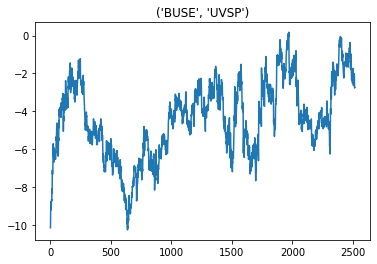

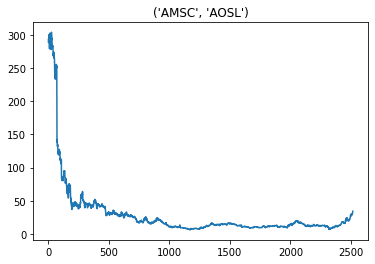

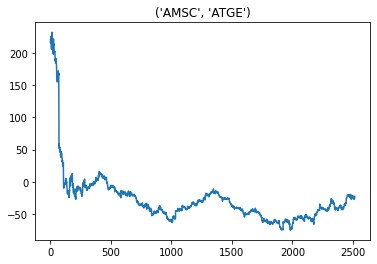

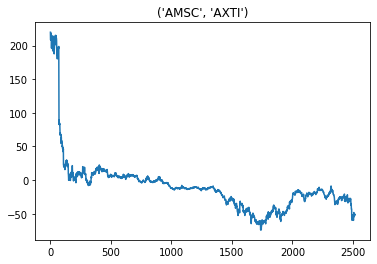

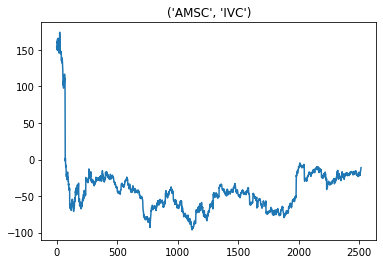

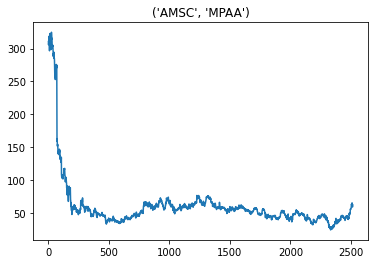

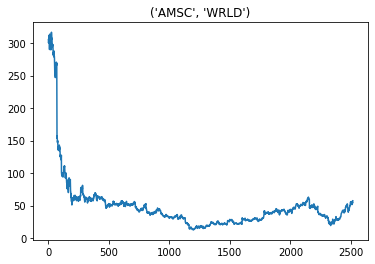

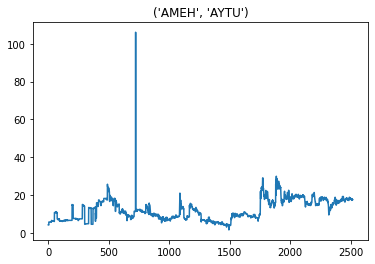

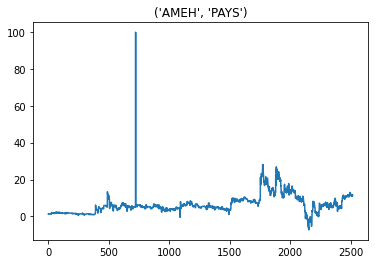

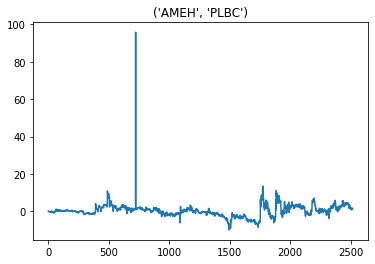

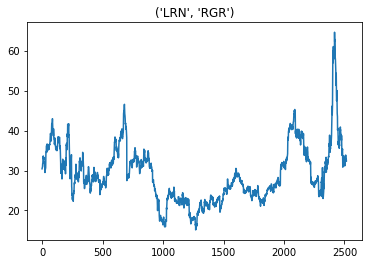

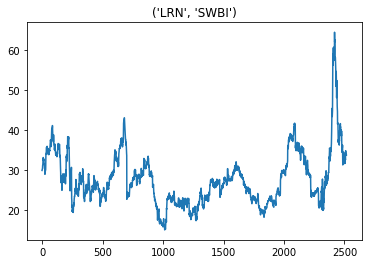

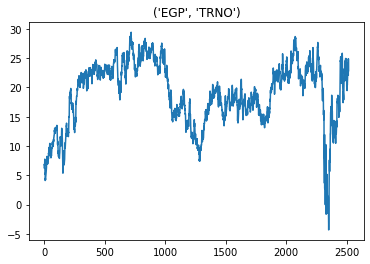

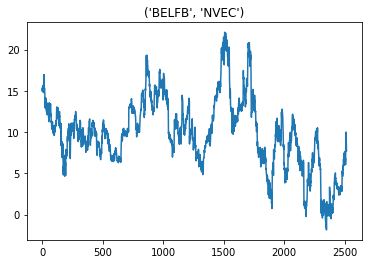

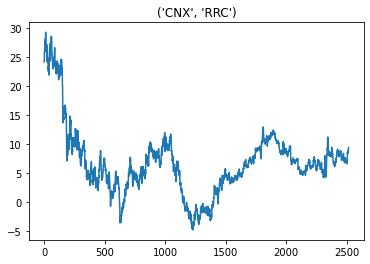

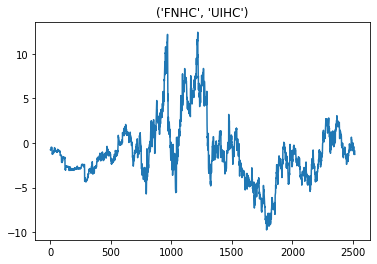

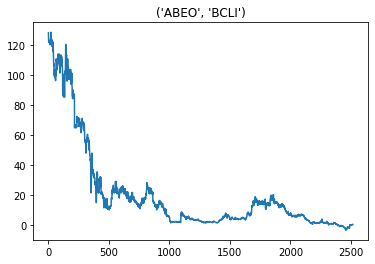

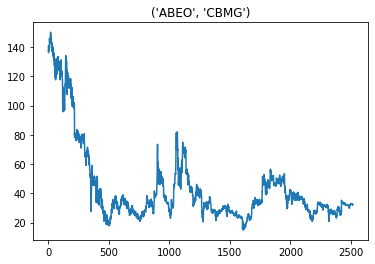

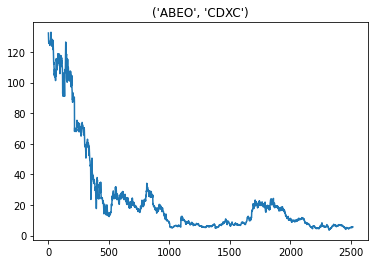

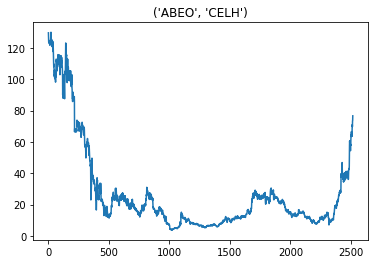

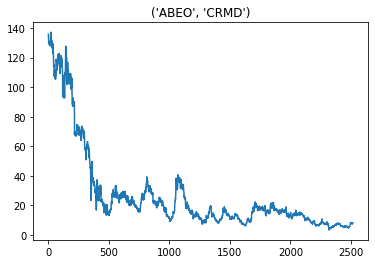

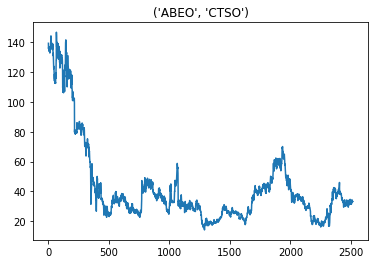

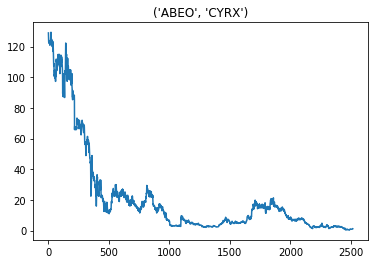

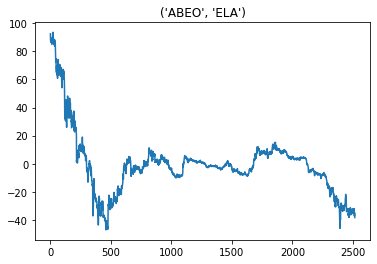

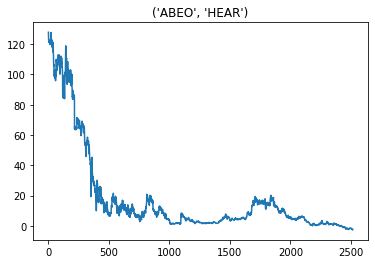

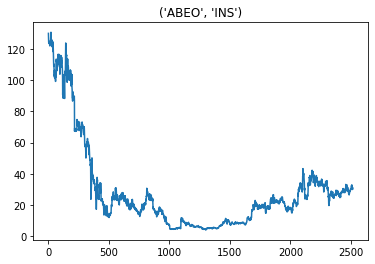

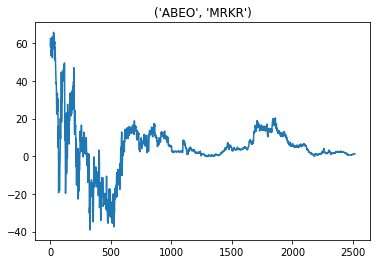

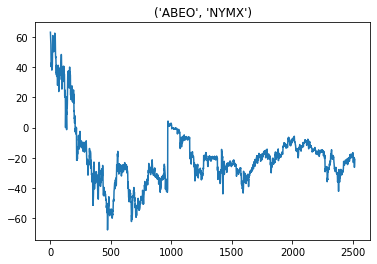

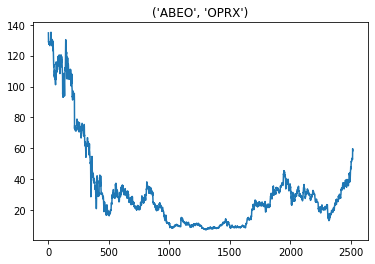

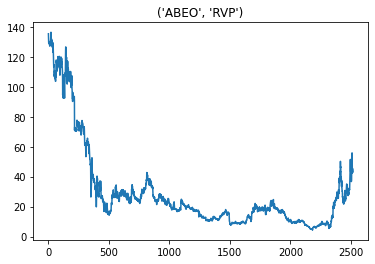

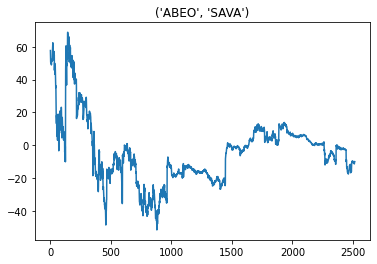

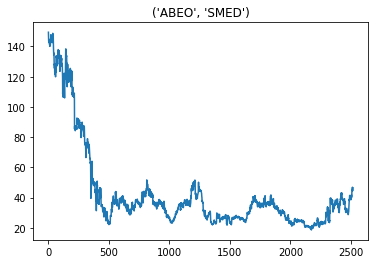

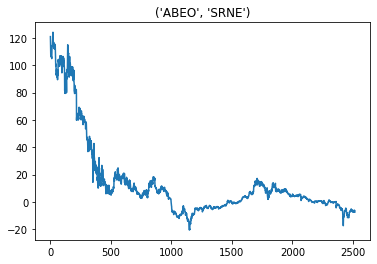

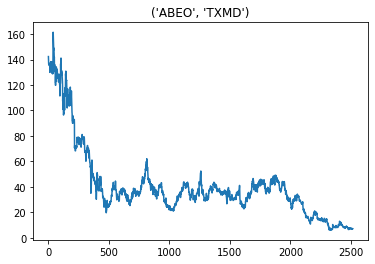

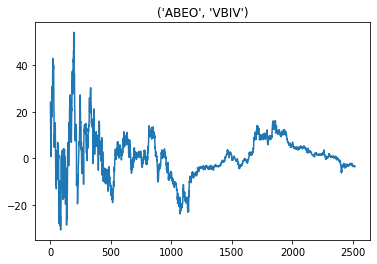

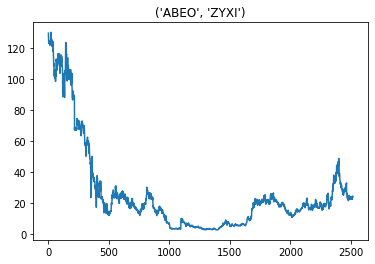

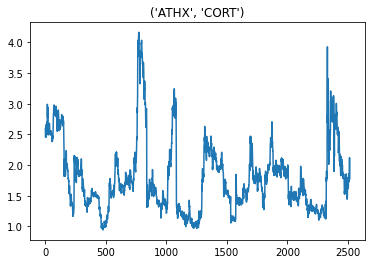

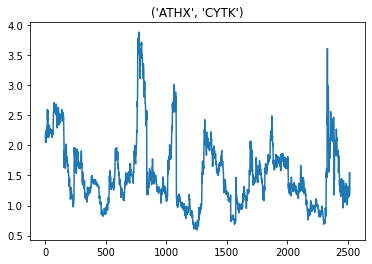

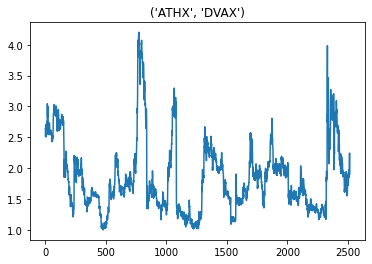

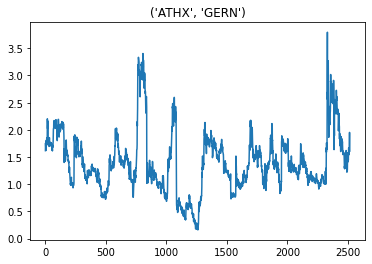

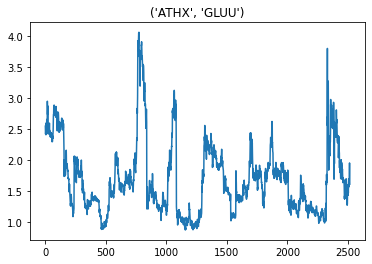

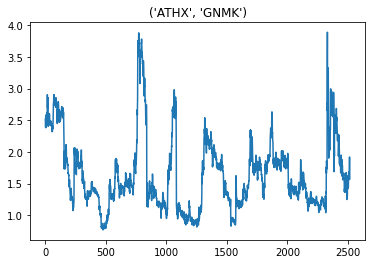

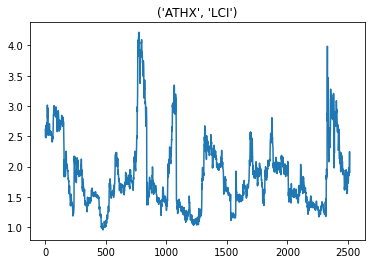

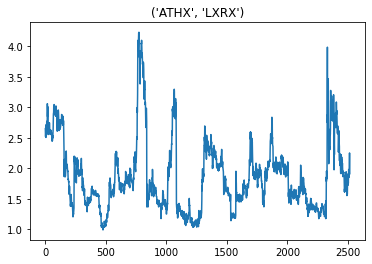

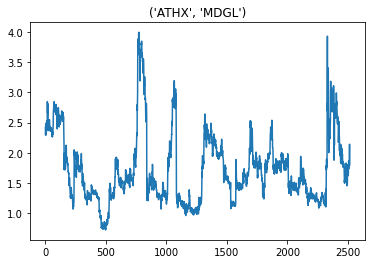

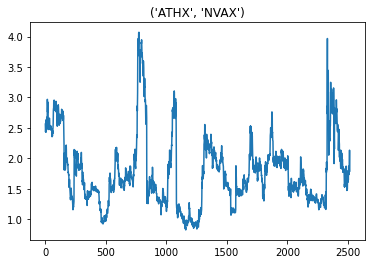

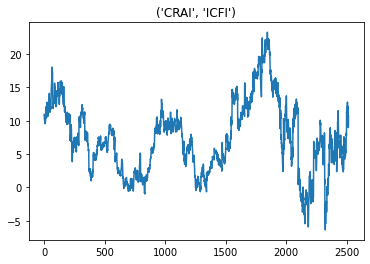

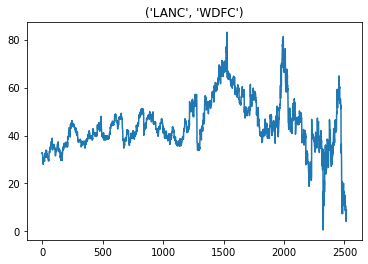

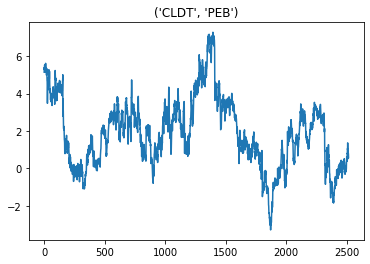

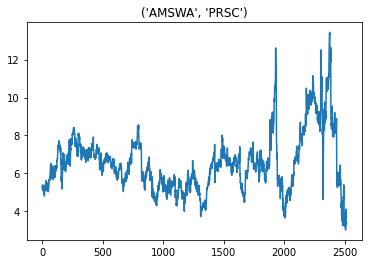

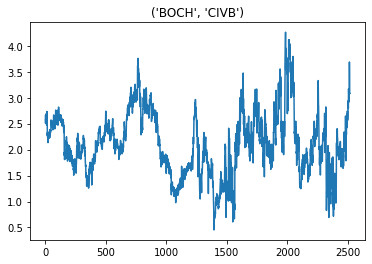

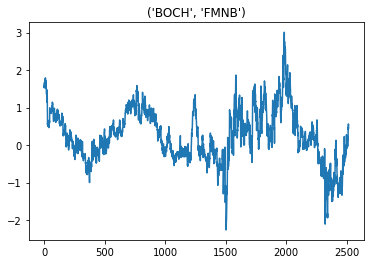

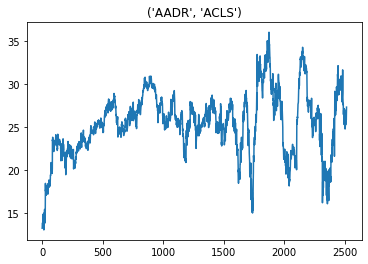

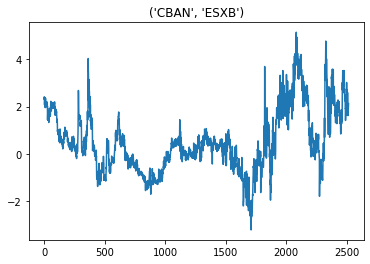

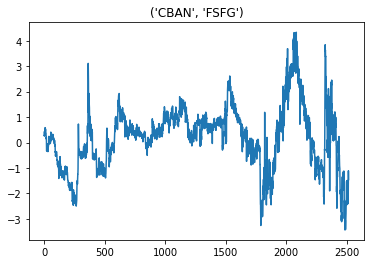

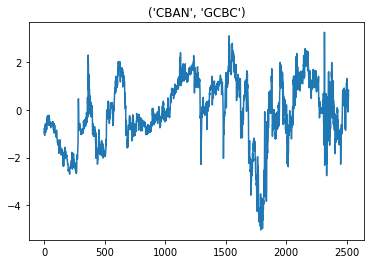

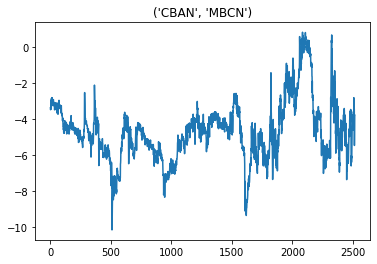

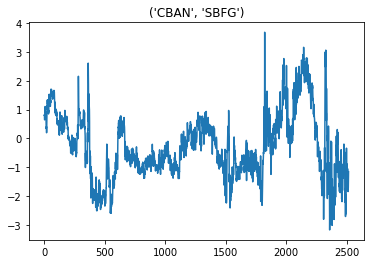

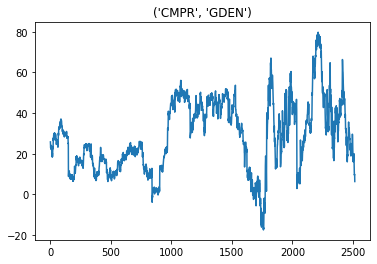

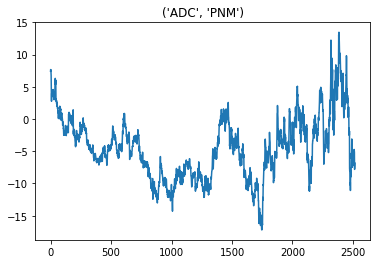

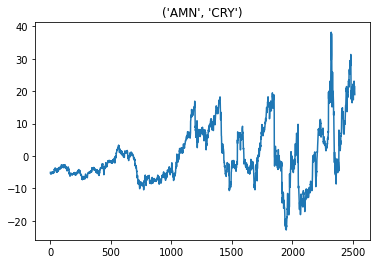

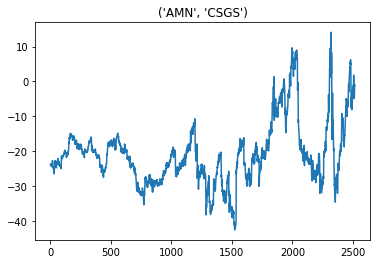

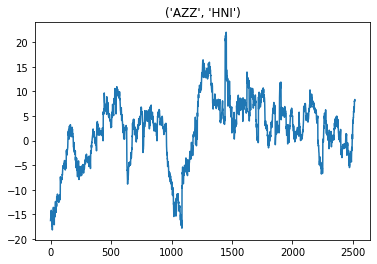

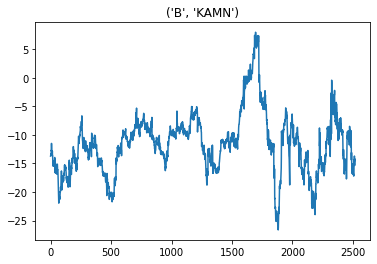

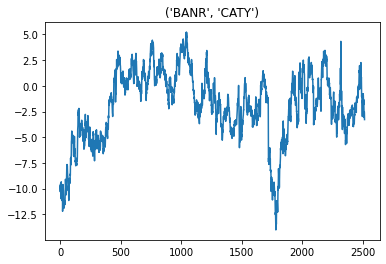

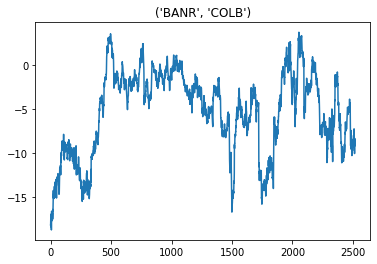

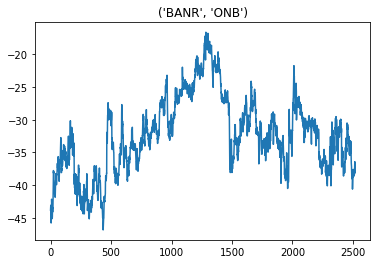

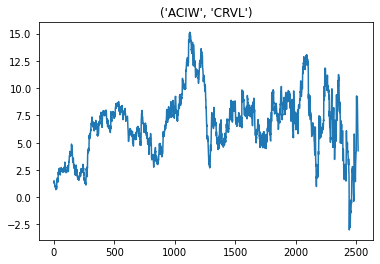

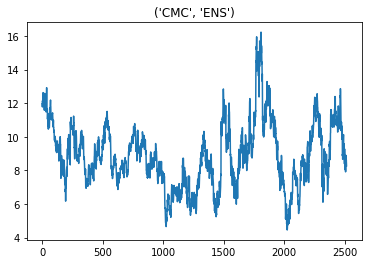

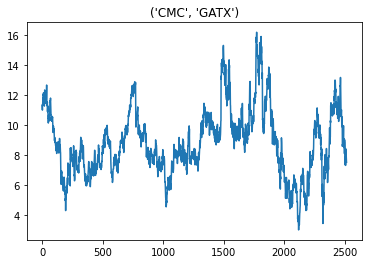

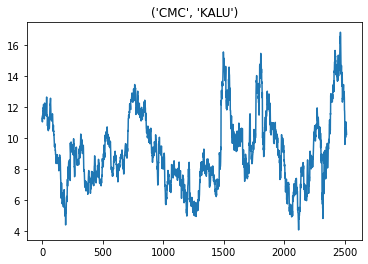

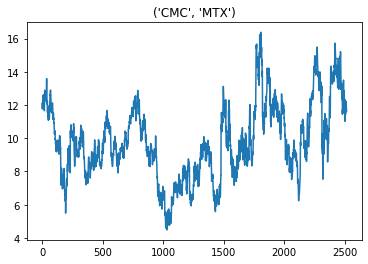

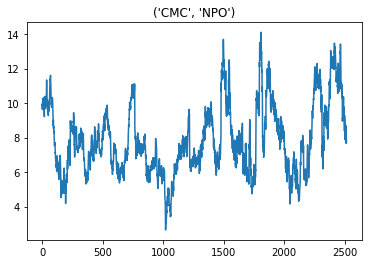

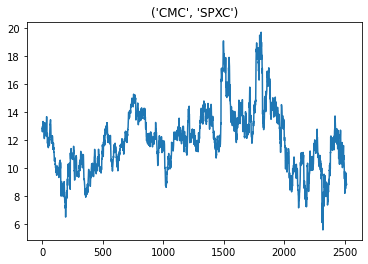

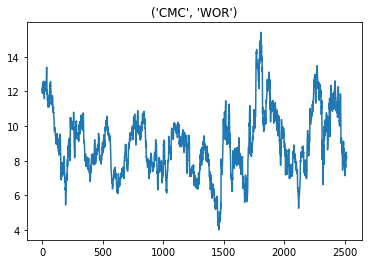

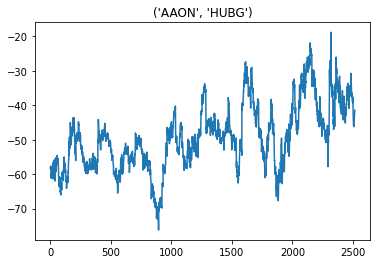

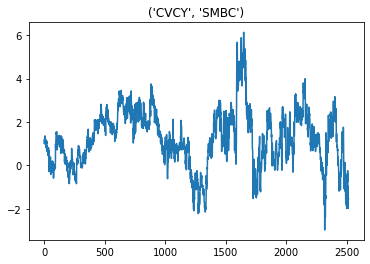

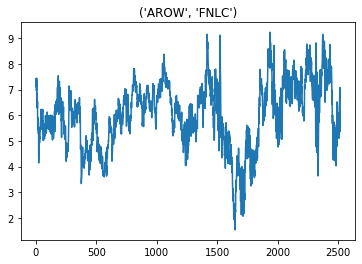

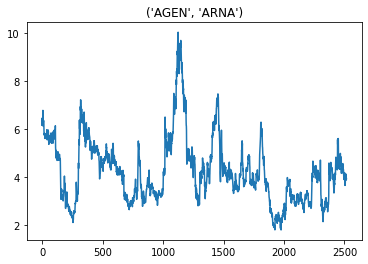

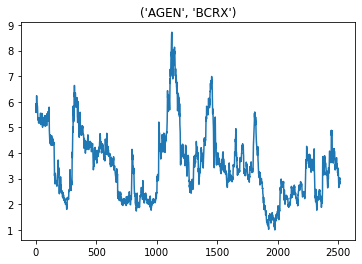

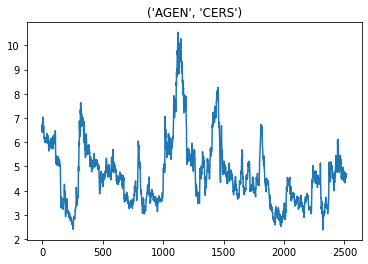

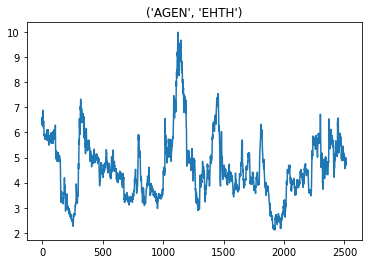

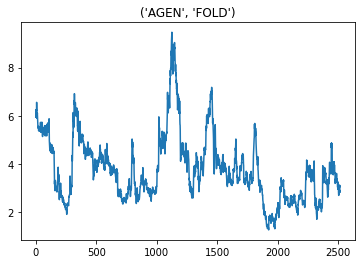

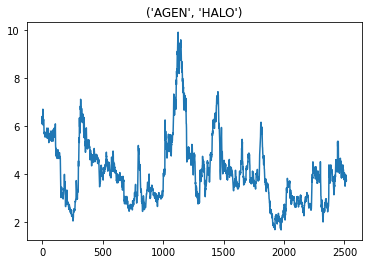

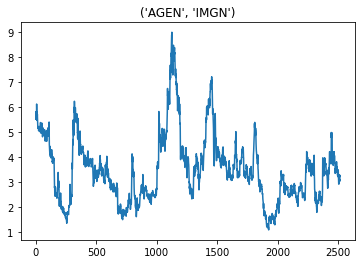

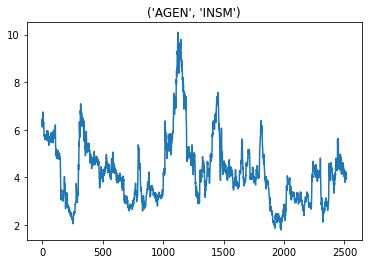

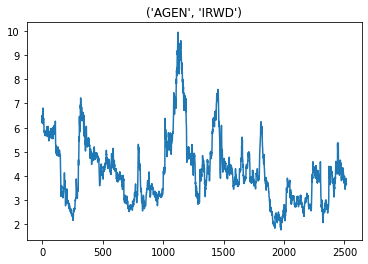

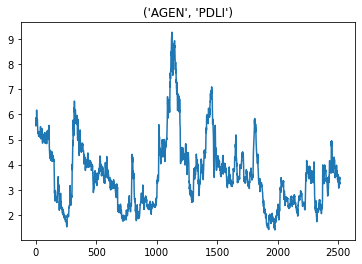

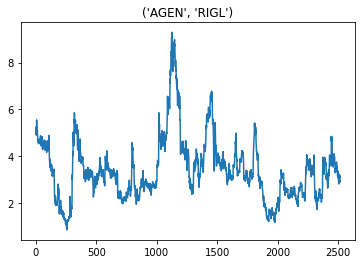

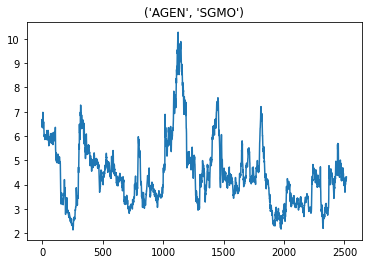

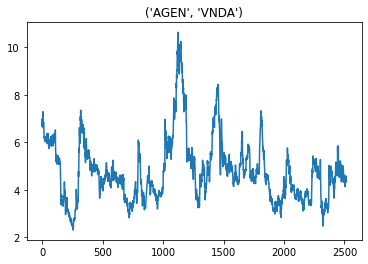

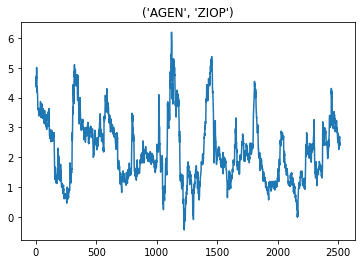

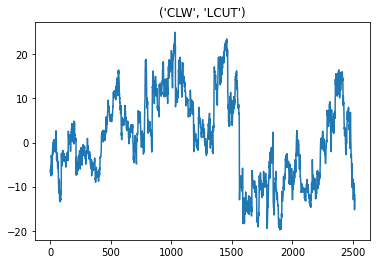

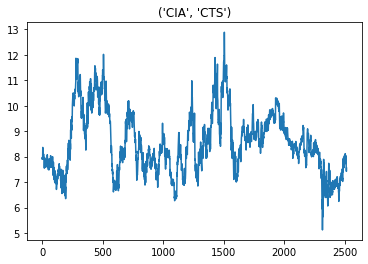

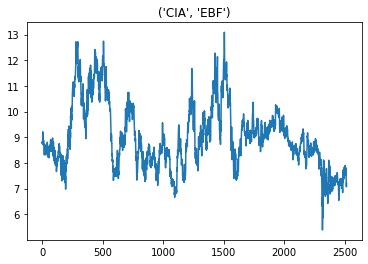

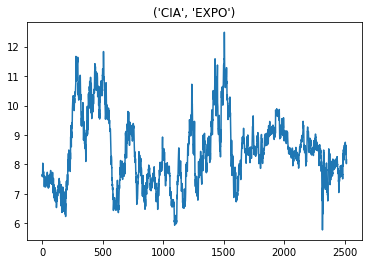

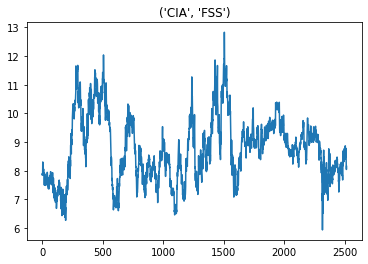

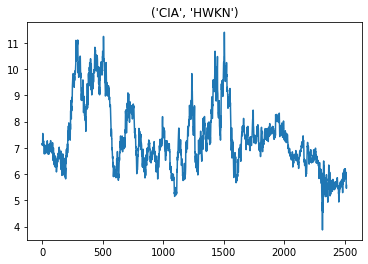

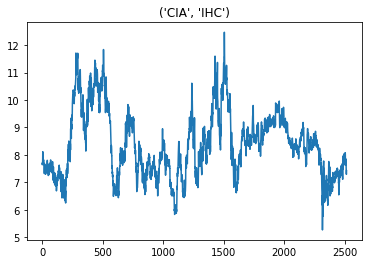

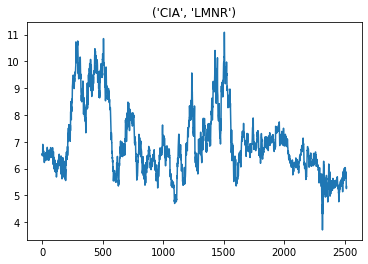

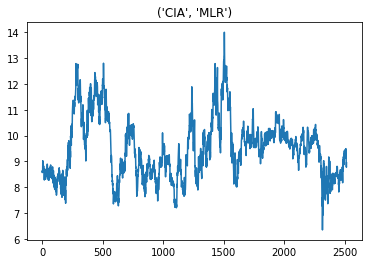

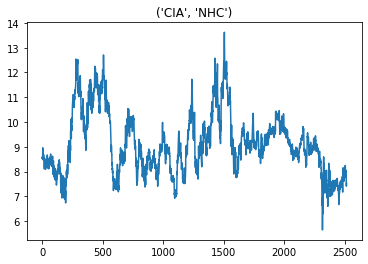

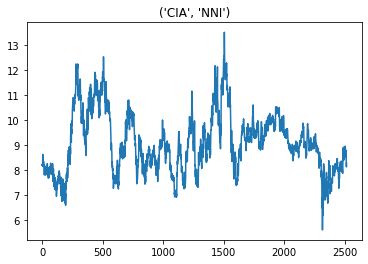

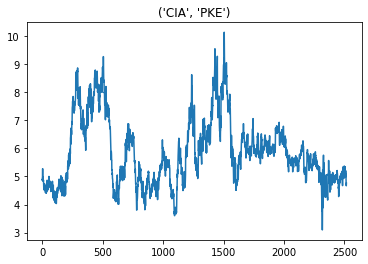

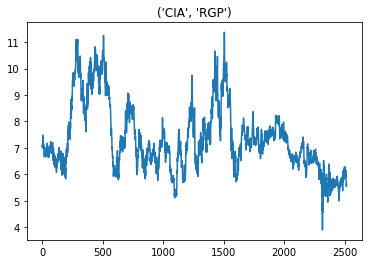

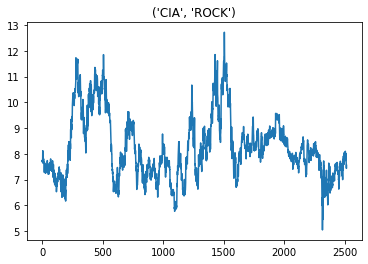

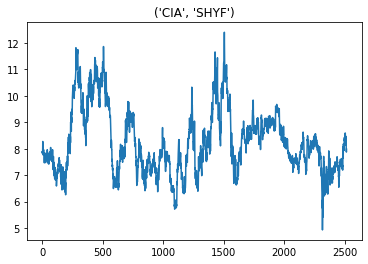

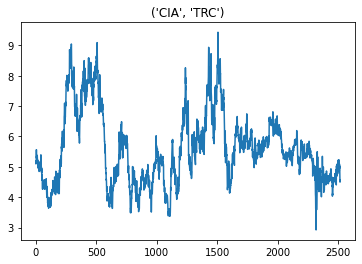

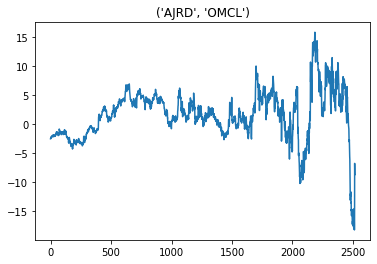

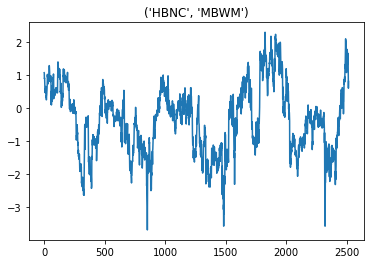

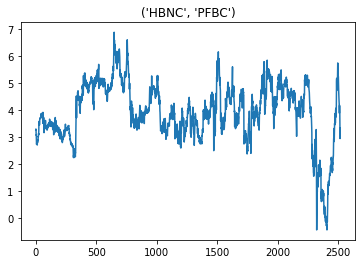

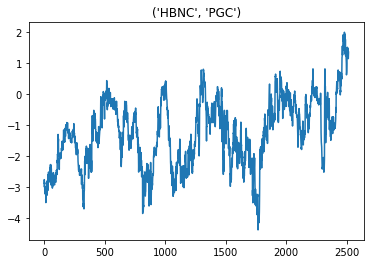

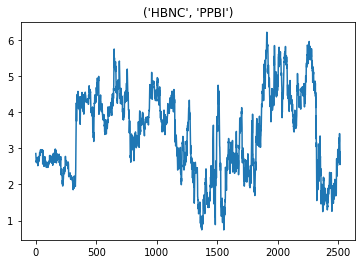

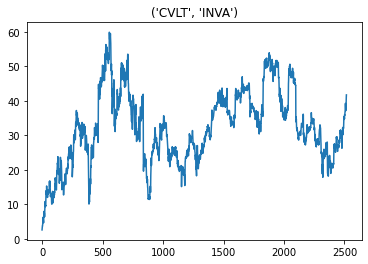

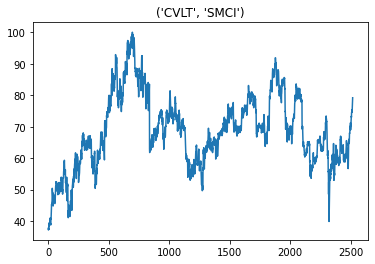

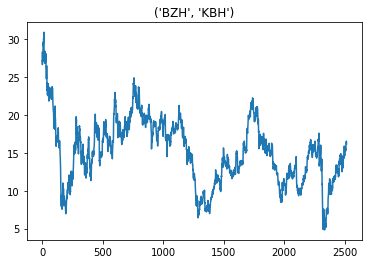

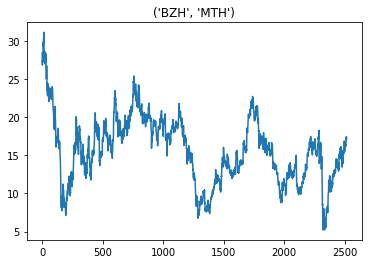

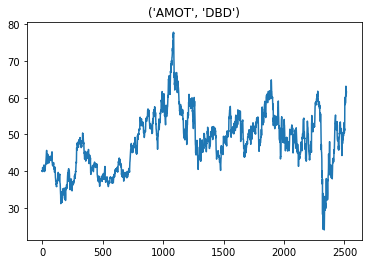

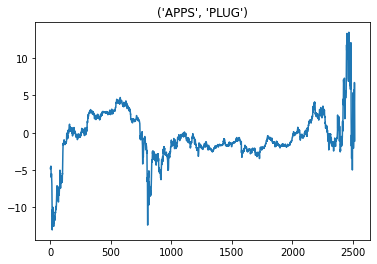

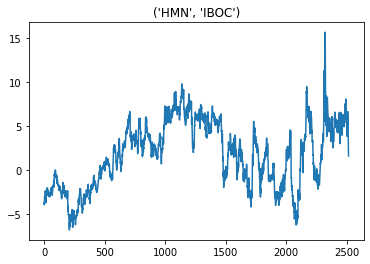

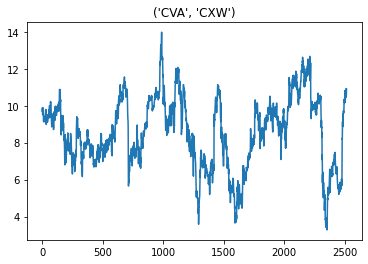

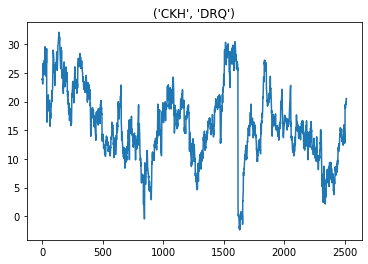

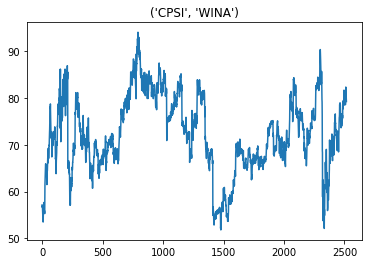

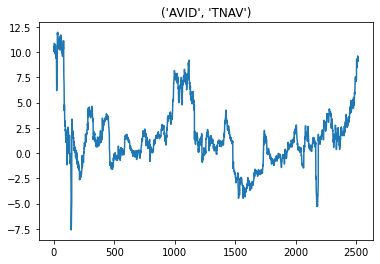

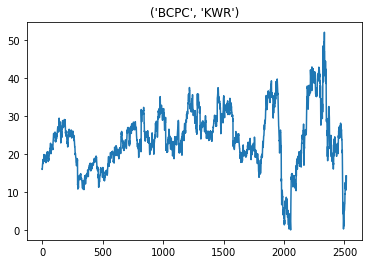

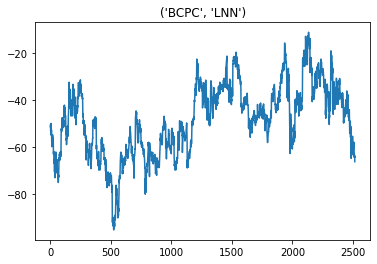

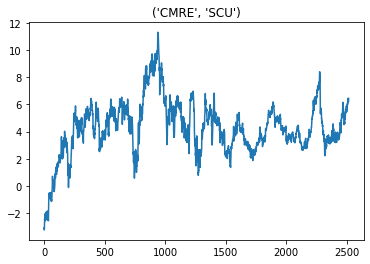

In [122]:
betas = []
stocks = []
spread = []

for i in range(0, len(tickers)):
    plt.figure()
    pair = []
    
    for j in range(0, len(tickers[i])):
        
        pair.append(data.loc[tickers[i][j]].close)
    
    X = sm.add_constant(pair[1].values)
    MODEL = sm.OLS(pair[0].values, X).fit()
    betas.append(MODEL.params[1])
    spread.append(pair[0].values - (betas[i] * pair[1]).values)
    plt.plot(spread[i])
    plt.title(tickers[i])
    plt.show()

In [123]:
pair_spread = pd.DataFrame(spread).T
pair_spread.columns = tickers
pair_spread.index = data["date"].unique()

In [124]:
pair_spread

,"(AUB, BXS)","(AUB, CVBF)","(AUB, FIBK)","(AUB, FRME)","(AUB, PRK)","(AUB, SBSI)","(AUB, TCBK)","(BFC, FCAP)","(ALSK, AMRS)","(ALSK, ANIP)",...,"(AMOT, DBD)","(APPS, PLUG)","(HMN, IBOC)","(CVA, CXW)","(CKH, DRQ)","(CPSI, WINA)","(AVID, TNAV)","(BCPC, KWR)","(BCPC, LNN)","(CMRE, SCU)"
20101227,-4.551375,-0.366646,2.528360,8.597203,-22.306069,-5.699207,-0.544905,-6.164135,5.134234,9.009293,...,40.144576,-4.814473,-3.748171,9.710987,23.883473,57.117378,10.329635,16.016427,-51.421837,-3.069543
20101228,-4.734815,-0.263014,2.453985,8.611473,-22.215704,-5.728012,-0.564193,-6.982767,5.111242,9.521081,...,40.163850,-4.654112,-3.965350,9.772431,23.902567,56.913667,10.539347,15.955735,-50.466254,-3.214566
20101229,-4.803731,-0.231198,2.367873,8.627147,-22.095136,-5.546381,-0.815652,-6.982767,3.819870,9.051081,...,39.948903,-4.654112,-3.681949,9.891160,23.753090,56.636436,10.409582,16.071927,-53.236915,-3.042145
20101230,-4.934815,-0.342110,2.138289,8.511361,-22.250033,-5.860803,-0.580955,-7.279373,4.054144,9.059313,...,39.893440,-4.804112,-3.376159,9.625032,24.007505,56.937901,10.029426,16.915318,-52.091071,-2.491965
20101231,-4.725770,-0.194845,2.185721,8.458496,-21.702576,-5.450329,-0.795261,-7.742077,4.030896,9.074020,...,40.251789,-4.483388,-2.948455,9.512606,23.061061,56.263569,10.198931,17.180587,-50.259656,-2.377615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20201217,-1.103380,-0.899517,-0.082108,7.013808,-18.213867,-4.177095,-0.556252,-11.078117,3.517931,2.510095,...,63.139638,4.447388,5.474446,10.916978,19.550659,81.651807,9.612197,13.225044,-62.797153,6.360795
20201218,-1.261846,-1.364982,-0.672865,6.618980,-17.758464,-4.136885,-1.706282,-10.988290,3.482809,2.490390,...,61.580152,6.717552,4.465878,10.892932,20.141780,81.385065,9.492171,14.285328,-63.365452,6.367593
20201221,-1.809682,-1.383182,-0.734461,6.154712,-18.173323,-4.634688,-1.085789,-9.618320,3.394330,2.463922,...,60.476442,6.580877,3.543534,10.534204,20.498147,79.904416,9.342145,10.563335,-64.611523,6.428920
20201222,-1.481465,-1.174119,-1.180990,6.366849,-18.683646,-4.897378,-1.207177,-9.953405,3.357618,2.450736,...,61.495306,2.476861,2.314827,10.833974,20.549739,79.987999,9.432171,13.319841,-63.726415,6.178920


In [125]:
%store betas

Stored 'betas' (list)


In [126]:
pair_spread.to_csv('data/pair_spread.csv', index=True)

#### END

In [ ]:
AEE = data.loc["AEE"][["adjclose"]]

In [ ]:
LNT = data.loc["LNT"][["adjclose"]]

In [ ]:
AEE["Return"] = np.log(AEE.adjclose / AEE.adjclose.shift(1))

In [ ]:
LNT["Return"] = np.log(LNT.adjclose / LNT.adjclose.shift(1))

In [ ]:
AEE.dropna(inplace=True)
LNT.dropna(inplace=True)

In [ ]:
AEE["Return"].cumsum().apply(np.exp).plot()
LNT["Return"].cumsum().apply(np.exp).plot()

In [ ]:
AEE

In [ ]:
X = sm.add_constant(LNT["adjclose"].values)
MODEL = sm.OLS(AEE["adjclose"].values, X).fit()

print(MODEL.params)
print(MODEL.rsquared)
print(str(MODEL.summary()))

In [ ]:
y = (MODEL.params[1] * LNT["adjclose"]).values

In [ ]:
x = AEE["adjclose"].values

In [ ]:
x

In [ ]:
y

In [ ]:
pd.DataFrame([x - y]).T.plot(figsize=(12,6))

In [ ]:
data.index.unique()